In [2]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
sentence = "The quick brown fox jumps over a lazy dog"
words = sentence.split()
vocab = {word: idx for idx, word in enumerate(words)}
tokens = [vocab[word] for word in words]

embedding_dim = 8
sequence_len = len(tokens)

In [5]:
embeddings = torch.randn((sequence_len, embedding_dim))

class simpleselfattention(nn.Module):
    def __init__(self, embed_dim):
        super(simpleselfattention, self).__init__()
        self.embed_dim = embed_dim
        self.query_linear = nn.Linear(embed_dim, embed_dim)
        self.key_linear = nn.Linear(embed_dim, embed_dim)
        self.value_linear = nn.Linear(embed_dim, embed_dim)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        Q = self.query_linear(x)
        K = self.key_linear(x)
        V = self.value_linear(x)

        scores = torch.matmul(Q,K.transpose(-2,-1))/np.sqrt(self.embed_dim)
        attention_weights = self.softmax(scores)
        attented_values = torch.matmul(attention_weights, V)
        return Q, K, V , attented_values, attention_weights
    
attention_layer = simpleselfattention(embedding_dim)
q, k, v, att_val, att_wgt = attention_layer(embeddings)

In [9]:
k.transpose(-2,-1).shape

torch.Size([8, 9])

In [10]:
torch.matmul(q, k.transpose(1,0)).shape

torch.Size([9, 9])

In [20]:
att_wgt.detach().numpy()

array([[0.07026931, 0.05855791, 0.18510838, 0.10183509, 0.18243569,
        0.09409757, 0.0640185 , 0.04236711, 0.20131049],
       [0.09484814, 0.08927535, 0.13369617, 0.09836454, 0.12421303,
        0.1253652 , 0.11696278, 0.10151582, 0.115759  ],
       [0.05758148, 0.04736115, 0.15746671, 0.11766304, 0.22395788,
        0.05991255, 0.03656553, 0.02325493, 0.27623674],
       [0.11022542, 0.11025555, 0.07838445, 0.12690711, 0.1402018 ,
        0.07446633, 0.11811873, 0.12178217, 0.11965845],
       [0.08886016, 0.10442283, 0.08632304, 0.13247968, 0.16075817,
        0.07119798, 0.09017275, 0.09200419, 0.17378111],
       [0.14760305, 0.1155512 , 0.17106143, 0.09485124, 0.07809998,
        0.11995289, 0.10138983, 0.09036129, 0.08112904],
       [0.05428552, 0.05970792, 0.15708049, 0.09440359, 0.1684162 ,
        0.13623619, 0.07592022, 0.05779814, 0.19615173],
       [0.05541137, 0.06358384, 0.18633595, 0.08413636, 0.11280864,
        0.21871977, 0.08275205, 0.06786315, 0.12838885],


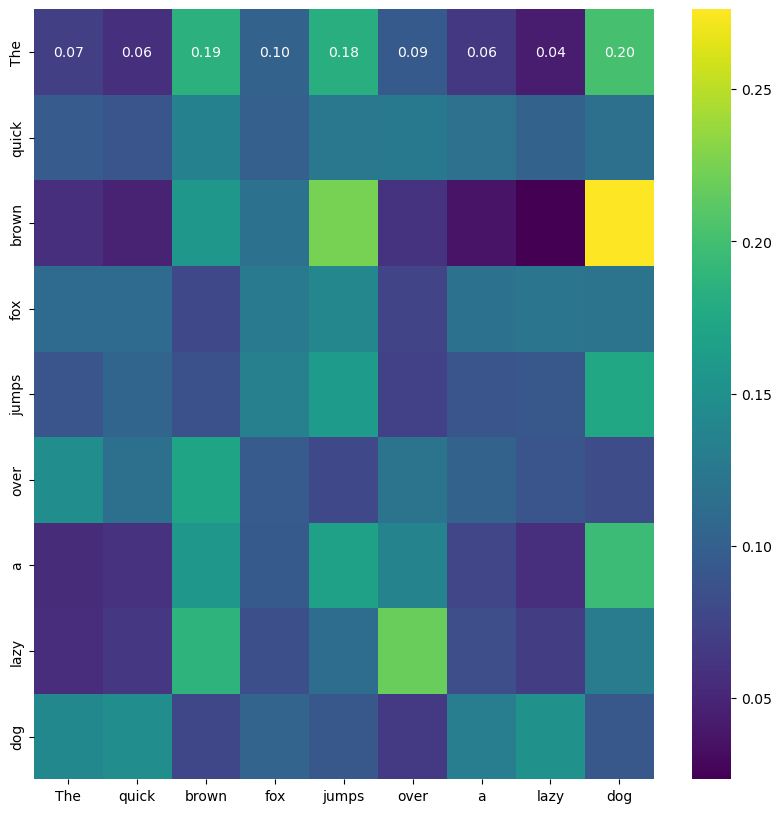

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(att_wgt.detach().numpy(),annot=True, cmap='viridis', xticklabels=words, yticklabels=words,fmt=".2f")
plt.show()


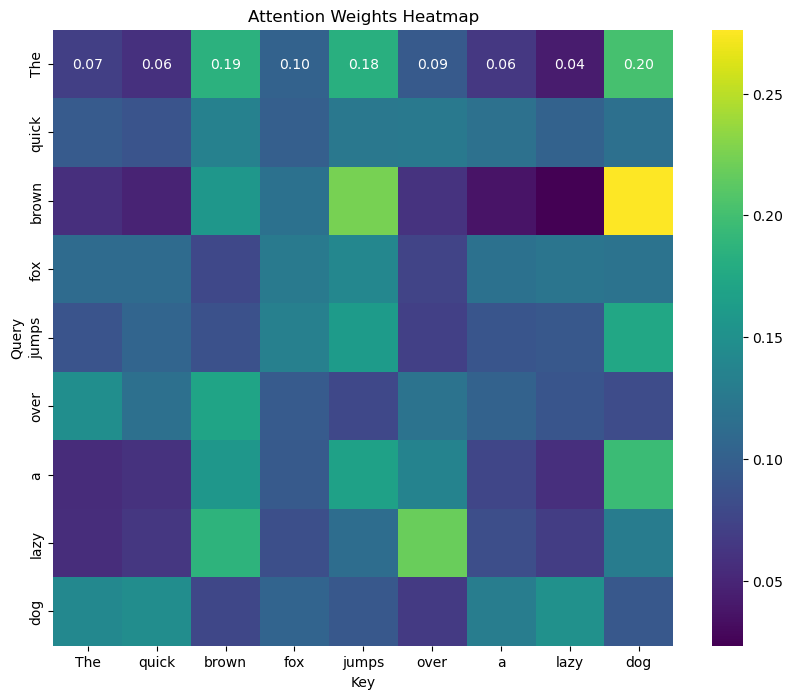

In [24]:
# Plot heatmap of attention weights
plt.figure(figsize=(10, 8))
sns.heatmap(att_wgt.detach().numpy(), annot=True, cmap='viridis', xticklabels=words, yticklabels=words, fmt=".2f")
plt.title('Attention Weights Heatmap')
plt.xlabel('Key')
plt.ylabel('Query')
plt.show()